SVM Accuracy: 1.00
k-NN Accuracy: 1.00

Comparison Summary (SVM vs. k-NN):
      Metric  SVM Class 0  k-NN Class 0  SVM Class 1  k-NN Class 1  \
0  Precision          1.0           1.0          1.0           1.0   
1     Recall          1.0           1.0          1.0           1.0   

   SVM Class 2  k-NN Class 2  
0          1.0           1.0  
1          1.0           1.0  


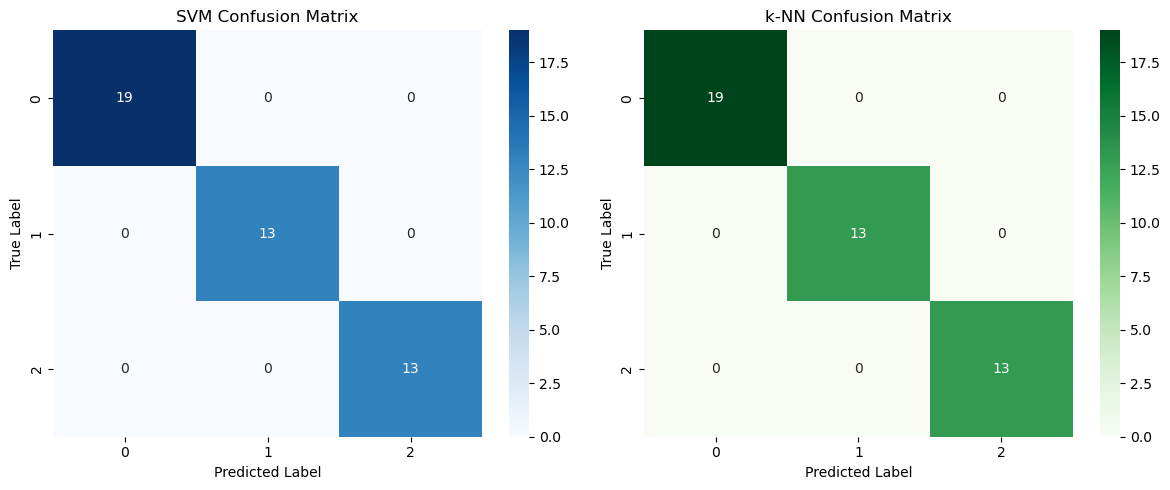

In [39]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SVM ###
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

### k-NN ###
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Print Accuracies
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

# Classification Report Summary
report_svm_df = pd.DataFrame(class_report_svm).transpose()
report_knn_df = pd.DataFrame(class_report_knn).transpose()

summary_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'SVM Class 0': [report_svm_df.loc['0', 'precision'], report_svm_df.loc['0', 'recall']],
    'k-NN Class 0': [report_knn_df.loc['0', 'precision'], report_knn_df.loc['0', 'recall']],
    'SVM Class 1': [report_svm_df.loc['1', 'precision'], report_svm_df.loc['1', 'recall']],
    'k-NN Class 1': [report_knn_df.loc['1', 'precision'], report_knn_df.loc['1', 'recall']],
    'SVM Class 2': [report_svm_df.loc['2', 'precision'], report_svm_df.loc['2', 'recall']],
    'k-NN Class 2': [report_knn_df.loc['2', 'precision'], report_knn_df.loc['2', 'recall']]
})

print("\nComparison Summary (SVM vs. k-NN):")
print(summary_df)

# ---------- Plot Confusion Matrices ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM Confusion Matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# k-NN Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("k-NN Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()
